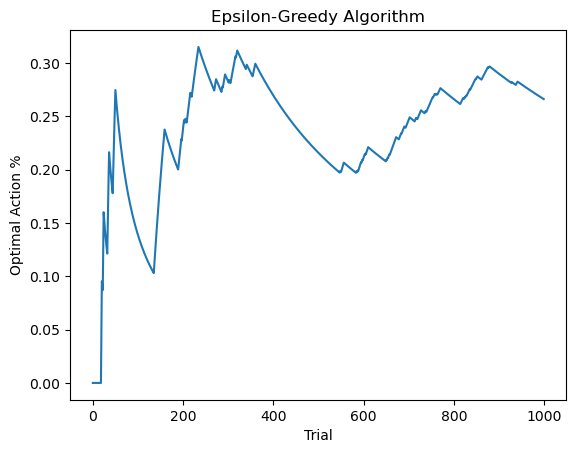

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and the number of trials
num_arms = 10
num_trials = 1000

# Define the true action values
true_action_values = np.random.normal(0, 1, size=num_arms)

# Define the initial action-value estimates
q_estimates = np.zeros(num_arms)

# Define the epsilon value to use
epsilon = 0.1

# Define an array to store the number of times the optimal action was chosen for each trial
optimal_action_counts = np.zeros(num_trials)

# Run the epsilon-greedy algorithm for the specified number of trials
for t in range(num_trials):
    # Choose an action
    if np.random.rand() < epsilon:
        # Choose a random action
        action = np.random.randint(num_arms)
    else:
        # Choose the action with the highest estimated value
        action = np.argmax(q_estimates)

    # Update the action-value estimate for the chosen action
    reward = true_action_values[action] + np.random.normal(0, 1)
    q_estimates[action] += 1/(optimal_action_counts[action]+1) * (reward - q_estimates[action])

    # Increment the optimal action count if the chosen action was optimal
    if action == np.argmax(true_action_values):
        optimal_action_counts[t] = 1

# Calculate the percentage of times the optimal action was selected up to each trial
optimal_action_perc = np.cumsum(optimal_action_counts) / np.arange(1, num_trials+1)

# Plot the results
plt.plot(optimal_action_perc)
plt.xlabel('Trial')
plt.ylabel('Optimal Action %')
plt.title('Epsilon-Greedy Algorithm')
plt.show()


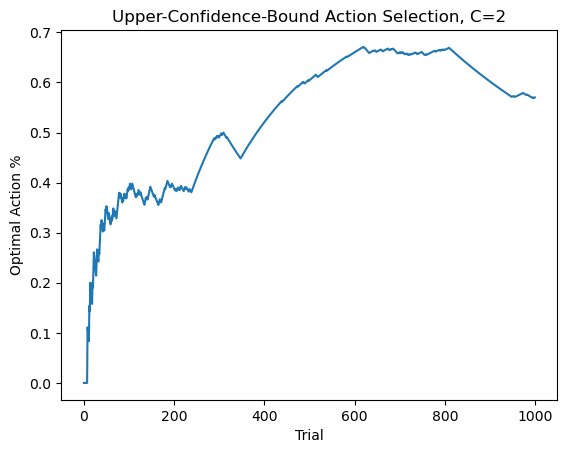

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms and the number of trials
num_arms = 10
num_trials = 1000

# Define the true action values
true_action_values = np.random.normal(0, 1, size=num_arms)

# Define the initial action-value estimates and action counts
q_estimates = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# Define the exploration parameter
c = 2

# Define an array to store the number of times the optimal action was chosen for each trial
optimal_action_counts = np.zeros(num_trials)

# Run the UCB algorithm for the specified number of trials
for t in range(num_trials):
    # Choose an action using the UCB formula
    if t < num_arms:
        # Select each action once initially
        action = t
    else:
        # Choose the action with the highest UCB value
        ucb_values = q_estimates + c * np.sqrt(np.log(t) / action_counts)
        action = np.argmax(ucb_values)

    # Update the action-value estimate for the chosen action
    reward = true_action_values[action] + np.random.normal(0, 1)
    action_counts[action] += 1
    q_estimates[action] += 1/action_counts[action] * (reward - q_estimates[action])

    # Increment the optimal action count if the chosen action was optimal
    if action == np.argmax(true_action_values):
        optimal_action_counts[t] = 1

# Calculate the percentage of times the optimal action was selected up to each trial
optimal_action_perc = np.cumsum(optimal_action_counts) / np.arange(1, num_trials+1)

# Plot the results
plt.plot(optimal_action_perc)
plt.xlabel('Trial')
plt.ylabel('Optimal Action %')
plt.title('Upper-Confidence-Bound Action Selection, C='+str(c))
plt.show()


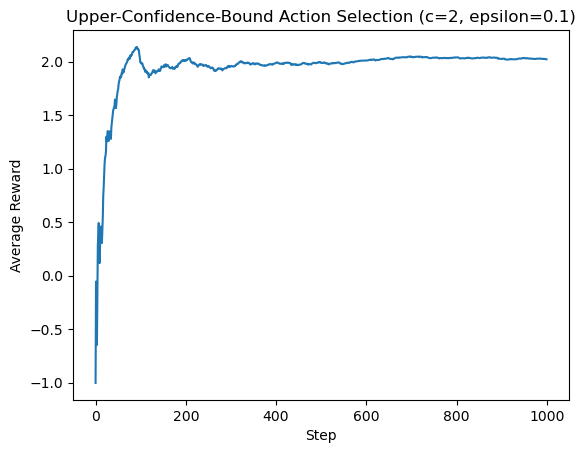

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# define the number of arms in the bandit problem
num_arms = 10

# define the true mean reward for each arm
true_means = np.random.normal(0, 1, num_arms)

# define the number of steps in the experiment
num_steps = 1000

# define the exploration parameter c for UCB
c = 2

# define the exploration parameter epsilon for e-greedy
epsilon = 0.1

# initialize the Q-value estimates and action counts to zero
q_values = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# initialize the array to store the rewards received at each step
rewards = np.zeros(num_steps)

# run the UCB algorithm
for i in range(num_steps):
    # calculate the UCB value for each action
    ucb_values = q_values + c * np.sqrt(np.log(i+1) / (action_counts + 1e-6))
    
    # choose the action with the highest UCB value (break ties randomly)
    if np.random.rand() < epsilon:
        action = np.random.choice(num_arms)
    else:
        action = np.random.choice(np.flatnonzero(ucb_values == ucb_values.max()))
    
    # get the reward for the chosen action (sample from the true reward distribution)
    reward = np.random.normal(true_means[action], 1)
    
    # update the Q-value estimate and action count for the chosen action
    q_values[action] += (reward - q_values[action]) / (action_counts[action] + 1)
    action_counts[action] += 1
    
    # store the received reward
    rewards[i] = reward

# calculate the running average reward per step
average_rewards = np.cumsum(rewards) / np.arange(1, num_steps+1)

# plot the average reward per step
plt.plot(average_rewards)
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title(f'Upper-Confidence-Bound Action Selection (c={c}, epsilon={epsilon})')
plt.show()


<function matplotlib.pyplot.legend(*args, **kwargs)>

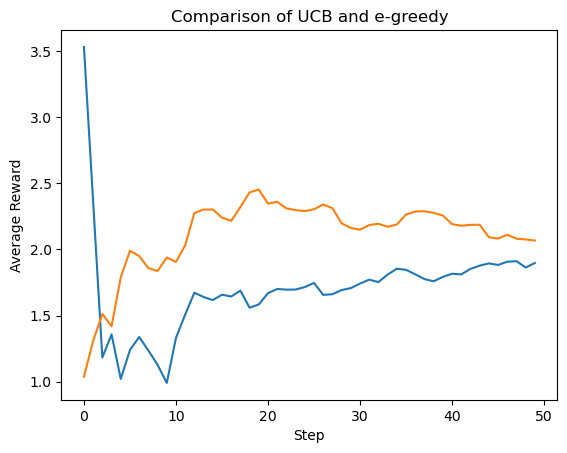

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# define the number of arms in the bandit problem
num_arms = 10

# define the true mean reward for each arm
true_means = np.random.normal(0, 1, num_arms)

# define the number of steps in the experiment
num_steps = 50

# define the exploration parameter c for UCB
c = 2

# define the exploration parameter epsilon for e-greedy
epsilon = 0.1

# initialize the Q-value estimates and action counts to zero
q_values = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# initialize the arrays to store the rewards received at each step
ucb_rewards = np.zeros(num_steps)
egreedy_rewards = np.zeros(num_steps)

# run the UCB algorithm
for i in range(num_steps):
    # calculate the UCB value for each action
    ucb_values = q_values + c * np.sqrt(np.log(i+1) / (action_counts + 1e-6))
    
    # choose the action with the highest UCB value (break ties randomly)
    action = np.random.choice(np.flatnonzero(ucb_values == ucb_values.max()))
    
    # get the reward for the chosen action (sample from the true reward distribution)
    reward = np.random.normal(true_means[action], 1)
    
    # update the Q-value estimate and action count for the chosen action
    q_values[action] += (reward - q_values[action]) / (action_counts[action] + 1)
    action_counts[action] += 1
    
    # store the received reward
    ucb_rewards[i] = reward

# reset the Q-value estimates and action counts to zero
q_values = np.zeros(num_arms)
action_counts = np.zeros(num_arms)

# run the e-greedy algorithm
for i in range(num_steps):
    # choose a random action with probability epsilon, or the greedy action otherwise
    if np.random.rand() < epsilon:
        action = np.random.choice(num_arms)
    else:
        action = np.random.choice(np.flatnonzero(q_values == q_values.max()))
    
    # get the reward for the chosen action (sample from the true reward distribution)
    reward = np.random.normal(true_means[action], 1)
    
    # update the Q-value estimate and action count for the chosen action
    q_values[action] += (reward - q_values[action]) / (action_counts[action] + 1)
    action_counts[action] += 1
    
    # store the received reward
    egreedy_rewards[i] = reward

# calculate the running average reward per step for UCB and e-greedy
ucb_average_rewards = np.cumsum(ucb_rewards) / np.arange(1, num_steps+1)
egreedy_average_rewards = np.cumsum(egreedy_rewards) / np.arange(1, num_steps+1)

# plot the average reward per step for UCB and e-greedy
plt.plot(ucb_average_rewards, label=f'UCB (c={c})')
plt.plot(egreedy_average_rewards, label=f'e-greedy (epsilon={epsilon})')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Comparison of UCB and e-greedy')
plt.legend
